In [168]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
%pwd


'/Users/ronjaboehmer/code/mariajoi/flightdelay/flightdelay/pickle'

In [49]:
%cd ../flightdelay/utils
from mytrans import MyTrans


[Errno 2] No such file or directory: '../flightdelay/utils'
/Users/ronjaboehmer/code/mariajoi/flightdelay/flightdelay/utils


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [50]:
df_test = pd.read_csv("../data/test_sample_top25_pairs_big_unbalanced.csv")
df_test = df_test.drop("Unnamed: 0", axis = 1)


In [51]:
df_train = pd.read_csv("../data/train_sample_top25_pairs_big_balanced.csv")
df_train = df_train.drop("Unnamed: 0", axis = 1)


In [52]:

X_test = df_test.drop(columns=['Tail_Number', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay',
             'Distance', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups','CRSDepTime', 'CRSArrTime' , 'Cancelled', 'CancellationCode',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
        'DestCityName', 'DestState', 'OriginCityName', 'OriginState', 'DestAirportID',
     'Flight_Number_Operating_Airline', 'OriginAirportID','FlightDate','DayofMonth'])

X_train = df_train.drop(columns=['Tail_Number', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay',
             'Distance', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups','CRSDepTime', 'CRSArrTime' , 'Cancelled', 'CancellationCode',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
        'DestCityName', 'DestState', 'OriginCityName', 'OriginState', 'DestAirportID',
     'Flight_Number_Operating_Airline', 'OriginAirportID','FlightDate','DayofMonth'])


In [53]:
X_train


,Month,DayOfWeek,Operating_Airline,Origin,Dest,DepTimeBlk,ArrTimeBlk,DistanceGroup
0,2,3,F9,SLC,PHX,0800-0859,1000-1059,3
1,2,2,WN,PHX,LAX,1600-1659,1700-1759,2
2,2,7,WN,IAH,MSY,1300-1359,1400-1459,2
3,2,4,F9,TPA,DEN,2100-2159,2300-2359,7
4,2,2,DL,SLC,SFO,1500-1559,1600-1659,3
...,...,...,...,...,...,...,...,...
508939,9,3,UA,LAX,EWR,2100-2159,0001-0559,10
508940,9,5,UA,ORD,IAH,1200-1259,1500-1559,4
508941,9,2,OO,CID,ORD,1700-1759,1800-1859,1
508942,9,6,AA,DFW,DEN,1800-1859,1900-1959,3


In [58]:
X_train.Dest.value_counts()


Dest
ATL    31658
ORD    27228
DEN    26560
DFW    21168
LGA    20488
       ...  
CRP      276
ROA      272
GRK      272
ECP      262
CHO      248
Name: count, Length: 121, dtype: int64

In [59]:
df_train["BadFlight"] = ((df_train['ArrivalDelayGroups'] > 0) | (df_train['Cancelled'] > 0)).astype(int)
y_train = df_train["BadFlight"]

df_test["BadFlight"] = ((df_test['ArrivalDelayGroups'] > 0) | (df_test['Cancelled'] > 0)).astype(int)
y_test = df_test["BadFlight"]


In [60]:
trans = MyTrans()
trans.fit(X_train)
X_train_trans =trans.transform(X_train)


In [61]:
trans = MyTrans()
trans.fit(X_test)
X_test_trans =trans.transform(X_test)


In [62]:
preproc = pickle.load(open("../pickle/preproc_nottrans_notfit_.pkl","rb"))
preproc


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12f315300>)])

# Model vs1

## Exporting to a pickle file

In [63]:
# Add estimator
model = RandomForestClassifier(max_depth=5, random_state=42)

# Create and Fit Pipeline
model_pipeline = make_pipeline(preproc, model)
model_pipeline.fit(X_train_trans,y_train)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12f315300>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])

In [10]:
# %cd ../pickle
# # Export Pipeline as pickle file

# with open("fitted_model_pipeline_vs2.pkl", "wb") as file:
#     pickle.dump(model_pipeline, file)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/ronjaboehmer/code/mariajoi/flightdelay/flightdelay/pickle


## Training and testing scores

### Data preproc

#### Using the balanced X_train and unbalanced y_train, limited to the flight paths that account for top 50% of all flights.

In [64]:
cross_val_score(model_pipeline, X_train_trans, y_train, cv=5, scoring='recall').mean()


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ronjaboehmer/.pyenv/versions/3.10.6/

0.7713949381458096

In [65]:
preproc.fit(X_train_trans)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12f315300>)])

In [67]:
X_train_trans_t = pd.DataFrame(preproc.transform(X_train_trans))


In [45]:
X_test_trans.columns


Index(['Operating_Airline ', 'Origin', 'Dest', 'DistanceGroup', 'Month_sin',
       'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'groups_DepTimeBlk',
       'groups_ArrTimeBlk'],
      dtype='object')

In [68]:
X_test_trans = X_test_trans.rename(columns = {'Operating_Airline ': "Operating_Airline"})


In [69]:
X_test_trans_t = pd.DataFrame(preproc.transform(X_test_trans))


In [70]:
model.fit(X_train_trans_t, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [71]:
y_pred = model.predict(X_test_trans_t)


In [72]:
y_pred_prob = model.predict_proba(X_test_trans_t)[:, 1]
y_pred2 = (y_pred_prob > 0.62).astype(int)


In [73]:
print('accuracy: %.3f' % accuracy_score(y_pred2, y_test))
print('f1_score: %.3f' % f1_score(y_pred2, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_pred2, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_pred2, y_test,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_pred2, y_test))


accuracy: 0.767
f1_score: 0.028
recall: 0.576
precision: 0.014
Confusion Matrix:  [[109910  33249]
 [   357    484]]


In [74]:
print('accuracy: %.3f' % accuracy_score(y_pred, y_test))
print('f1_score: %.3f' % f1_score(y_pred, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_pred, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_pred, y_test,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_pred, y_test))


accuracy: 0.497
f1_score: 0.412
recall: 0.283
precision: 0.752
Confusion Matrix:  [[46140  8370]
 [64127 25363]]


## Gradient boosting

In [70]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gb_clf.fit(X_train_trans_t, y_train)
y_preds_num = gb_clf.predict(X_test_trans_t)
print('accuracy: %.3f' % accuracy_score(y_preds_num,y_test))
print('f1_score: %.3f' % f1_score(y_preds_num,y_test, average='macro'))
print('recall: %.3f' % recall_score(y_preds_num,y_test,average='macro'))
print('precision: %.3f' % precision_score(y_preds_num,y_test,average='macro'))


print("Confusion Matrix: ", confusion_matrix(y_preds_num,y_test))


accuracy: 0.519
f1_score: 0.503
recall: 0.562
precision: 0.583
Confusion Matrix:  [[1261  255]
 [1475  609]]


In [77]:

# Instantiate model
gb_clf_grid = GradientBoostingClassifier(random_state=42)

param_grid_subset = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

# Hyperparameter Grid
grid_params = {'n_estimators': [50, 100, 200],                # Number of boosting stages to be run
                'learning_rate': [0.01, 0.1, 0.2],             # Step size shrinkage to prevent overfitting
                'max_depth': [3, 4, 5],                        # Maximum depth of the individual trees
                'min_samples_split': [2, 5, 10],               # Minimum samples required to split an internal node
                'min_samples_leaf': [1, 2, 4],                 # Minimum samples required to be at a leaf node
                'subsample': [0.8, 0.9, 1.0],                  # Fraction of samples used for fitting the trees
                'max_features': ['auto', 'sqrt', 'log2', None] # Number of features to consider for the best split
                }
scorers = {
  'precision_score': make_scorer(precision_score),
  'recall_score': make_scorer(recall_score),
  'accuracy_score': make_scorer(accuracy_score),
  'f1_score': make_scorer(f1_score)
}

# Instantiate Grid Search
search_gb = GridSearchCV(
    gb_clf_grid,
    param_grid_subset,
    scoring = "recall",
    cv = 5,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search_gb.fit(X_train_trans_t, y_train)
print(search_gb.best_estimator_)
print(search_gb.best_score_)
print(search_gb.best_params_)
print(search_gb.scorer_)


GradientBoostingClassifier(max_depth=4, n_estimators=50, random_state=42,
                           subsample=0.8)
0.6916444186648063
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}
make_scorer(recall_score, average=binary)


In [79]:
gb_clf_grid = GradientBoostingClassifier(max_depth=4, n_estimators=50, random_state=42,
                           subsample=0.8)
gb_clf_grid.fit(X_train_trans_t, y_train)
y_preds_num = gb_clf_grid.predict(X_test_trans_t)
print('accuracy: %.3f' % accuracy_score(y_preds_num,y_test))
print('f1_score: %.3f' % f1_score(y_preds_num,y_test, average='macro'))
print('recall: %.3f' % recall_score(y_preds_num,y_test,average='macro'))
print('precision: %.3f' % precision_score(y_preds_num,y_test,average='macro'))


print("Confusion Matrix: ", confusion_matrix(y_preds_num,y_test))


accuracy: 0.556
f1_score: 0.528
recall: 0.566
precision: 0.590
Confusion Matrix:  [[1433  297]
 [1303  567]]


## Adaboost

In [74]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=10), learning_rate=0.1, random_state=42)
ada_clf.fit(X_train_trans_t, y_train)
y_preds_ada = ada_clf.predict(X_test_trans_t)

print('accuracy: %.3f' % accuracy_score(y_preds_ada,y_test))
print('f1_score: %.3f' % f1_score(y_preds_ada, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds_ada, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds_ada, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds_ada,y_test))


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy: 0.566
f1_score: 0.404
recall: 0.301
precision: 0.611
Confusion Matrix:  [[1511  336]
 [1225  528]]


# XGBoost

In [81]:
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, subsample= 0.999, random_state=42)
xgb_clf.fit(X_train_trans_t, y_train)
y_preds_xgb = xgb_clf.predict(X_test_trans_t)
print('accuracy: %.3f' % accuracy_score(y_preds_xgb,y_test))
print('f1_score: %.3f' % f1_score(y_preds_xgb, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds_xgb, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds_xgb, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds_xgb,y_test))


accuracy: 0.549
f1_score: 0.393
recall: 0.290
precision: 0.610
Confusion Matrix:  [[1448  337]
 [1288  527]]


# Using unbalanced data

In [83]:
df


,Unnamed: 0,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,292930,1,10,1,2022-01-10,9E,N8783E,5083,15323,TRI,...,74.0,56.0,40.0,227.0,1,NaN,NaN,NaN,NaN,NaN
1,352048,1,30,7,2022-01-30,AA,N9008U,2115,11066,CMH,...,178.0,198.0,148.0,990.0,4,0.0,0.0,18.0,0.0,0.0
2,238647,1,7,5,2022-01-07,WN,N263WN,6187,10423,AUS,...,100.0,89.0,70.0,528.0,3,62.0,0.0,0.0,0.0,0.0
3,274529,1,30,7,2022-01-30,YX,NaN,4578,11995,GSO,...,108.0,NaN,NaN,461.0,2,NaN,NaN,NaN,NaN,NaN
4,27136,1,19,3,2022-01-19,DL,N816DN,1508,14524,RIC,...,106.0,98.0,75.0,481.0,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,92725,12,28,3,2022-12-28,AA,N165US,2545,13891,ONT,...,174.0,189.0,150.0,1188.0,5,0.0,0.0,15.0,0.0,154.0
23996,150355,12,12,1,2022-12-12,DL,N822DN,511,10693,BNA,...,287.0,267.0,246.0,1797.0,8,NaN,NaN,NaN,NaN,NaN
23997,82305,12,15,4,2022-12-15,AA,N819NN,1397,13303,MIA,...,201.0,213.0,182.0,1251.0,6,32.0,0.0,12.0,0.0,13.0
23998,56354,12,17,6,2022-12-17,AA,N805AN,2826,13930,ORD,...,230.0,225.0,188.0,1440.0,6,0.0,0.0,0.0,0.0,18.0


In [103]:
df = pd.read_csv("../data/train_sample_top25_pairs_big_unbalanced.csv")
df = df.drop("Unnamed: 0", axis = 1)


In [ ]:
df


In [104]:

X = df.drop(columns=['Tail_Number', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay',
             'Distance', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups','CRSDepTime', 'CRSArrTime' , 'Cancelled', 'CancellationCode',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
        'DestCityName', 'DestState', 'OriginCityName', 'OriginState', 'DestAirportID',
     'Flight_Number_Operating_Airline', 'OriginAirportID','FlightDate','DayofMonth'])


In [105]:
df["BadFlight"] = ((df['ArrivalDelayGroups'] > 0) | (df['Cancelled'] > 0)).astype(int)
y = df["BadFlight"]


In [120]:
trans = MyTrans()
trans.fit(X)
X_trans =trans.transform(X)


In [107]:
X_trans_dep = X_trans.drop(columns = "groups_ArrTimeBlk")


In [148]:
X_trans_or_de =  X_trans.drop(columns = ["Origin", "Dest"])


In [153]:
(X_train, X_test, y_train, y_test) = train_test_split(X_trans, y, test_size = .2, stratify=y, random_state=43)


In [116]:
(X_train_dep, X_test_dep, y_train_dep, y_test_dep) = train_test_split(X_trans_dep, y, test_size = .2, stratify=y, random_state=43)


In [149]:
(X_train_or_de, X_test_or_de, y_train_or_de, y_test_or_de) = train_test_split(X_trans_or_de, y, test_size = .2, stratify=y, random_state=43)


In [154]:
preproc.fit(X_train)
X_train_t = preproc.transform(X_train)
X_test_t = preproc.transform(X_test)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
preproc.fit(X_train_dep)
X_train_t_dep = preproc.transform(X_train_dep)
X_test_t_dep = preproc.transform(X_test_dep)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [150]:
preproc.fit(X_train_or_de)
X_train_t_or_de= preproc.transform(X_train_or_de)
X_test_t_or_de = preproc.transform(X_test_or_de)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
pd.DataFrame(X_train_t)


,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,-0.866025,-5.000000e-01,9.749279e-01,-0.222521
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,-0.500000,8.660254e-01,7.818315e-01,0.623490
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,-0.500000,-8.660254e-01,-9.749279e-01,-0.222521
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,-1.000000,-1.836970e-16,-2.449294e-16,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2.0,-0.866025,-5.000000e-01,-4.338837e-01,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,11.0,0.866025,-5.000000e-01,-9.749279e-01,-0.222521
647996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.500000,8.660254e-01,-9.749279e-01,-0.222521
647997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,-0.866025,5.000000e-01,-9.749279e-01,-0.222521
647998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,10.0,-1.000000,-1.836970e-16,-7.818315e-01,0.623490


## Random Forest

In [123]:
X_train_t.shape


(648000, 274)

In [118]:
X_train_t_dep.shape


(648000, 271)

In [151]:
X_train_t_or_de.shape


(648000, 32)

In [156]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=randomF, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_t, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

best_score = grid_search.best_score_

# Make predictions on the test set
y_preds = best_model.predict(X_test_t)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print("Best Parameters:", best_params)
print("Score/Accuracy on validation:", best_score)
print("Accuracy on Test Set:", accuracy)
print("Recall on Test Set:", recall)


KeyboardInterrupt: 

In [125]:
randomF = RandomForestClassifier(class_weight='balanced', random_state=42)
randomF.fit(X_train_t , y_train)
y_preds_tr = randomF.predict(X_train_t)
y_preds = randomF.predict(X_test_t)

print('Train data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds_tr,y_train))
print('f1_score: %.3f' % f1_score(y_preds_tr,y_train, average='binary'))
print('recall: %.3f' % recall_score(y_preds_tr,y_train,average='binary'))
print('precision: %.3f' % precision_score(y_preds_tr,y_train,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds_tr,y_train))

print('Test data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


Train data scores:
accuracy: 0.922
f1_score: 0.852
recall: 0.767
precision: 0.957
Confusion Matrix:  [[452092   6517]
 [ 44039 145352]]
Test data scores:
accuracy: 0.847
f1_score: 0.687
recall: 0.660
precision: 0.717
Confusion Matrix:  [[109980  10745]
 [ 14053  27222]]


In [171]:
X_train_t_df = pd.DataFrame(X_train_t)


In [172]:
float_columns = X_train_t_df.select_dtypes(include='float64').columns
X_train_t_df[float_columns] = X_train_t_df[float_columns].astype('float16')


In [173]:
# Add estimator
randomF = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create and Fit Pipeline
randomF_pipeline = make_pipeline(preproc, randomF)
randomF_pipeline.fit(X_train_t_df,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12f315300>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [174]:
%cd ../pickle
# Export Pipeline as pickle file

with gzip.open("fitted_randomF_pipeline_vs5.pkl", "wb") as file:
    pickle.dump(randomF_pipeline, file)


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/ronjaboehmer/code/mariajoi/flightdelay/flightdelay/pickle


In [129]:
selected_columns = ['DistanceGroup', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos']
all_transformed_cols = X_train_trans.columns
selected_transformed_cols = all_transformed_cols.intersection(selected_columns)
selected_transformed_cols


Index(['DistanceGroup', 'Month_sin', 'Month_cos', 'DayOfWeek_sin',
       'DayOfWeek_cos'],
      dtype='object')

In [136]:
preproc.named_transformers_


{'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False),
 'remainder': 'passthrough'}

In [137]:
columns=np.concatenate([
    preproc.named_transformers_['onehotencoder'].get_feature_names_out(),
    selected_transformed_cols])


array(['Operating_Airline_9E', 'Operating_Airline_AA',
       'Operating_Airline_AS', 'Operating_Airline_B6',
       'Operating_Airline_C5', 'Operating_Airline_DL',
       'Operating_Airline_F9', 'Operating_Airline_G4',
       'Operating_Airline_G7', 'Operating_Airline_HA',
       'Operating_Airline_MQ', 'Operating_Airline_NK',
       'Operating_Airline_OH', 'Operating_Airline_OO',
       'Operating_Airline_PT', 'Operating_Airline_QX',
       'Operating_Airline_UA', 'Operating_Airline_WN',
       'Operating_Airline_YV', 'Operating_Airline_YX',
       'Operating_Airline_ZW', 'Origin_ABQ', 'Origin_ANC', 'Origin_ASE',
       'Origin_ATL', 'Origin_ATW', 'Origin_AUS', 'Origin_AVL',
       'Origin_BDL', 'Origin_BHM', 'Origin_BNA', 'Origin_BOI',
       'Origin_BOS', 'Origin_BUF', 'Origin_BUR', 'Origin_BWI',
       'Origin_BZN', 'Origin_CAE', 'Origin_CHA', 'Origin_CHO',
       'Origin_CHS', 'Origin_CID', 'Origin_CLE', 'Origin_CLT',
       'Origin_CMH', 'Origin_COS', 'Origin_CRP', 'Origin_CVG',

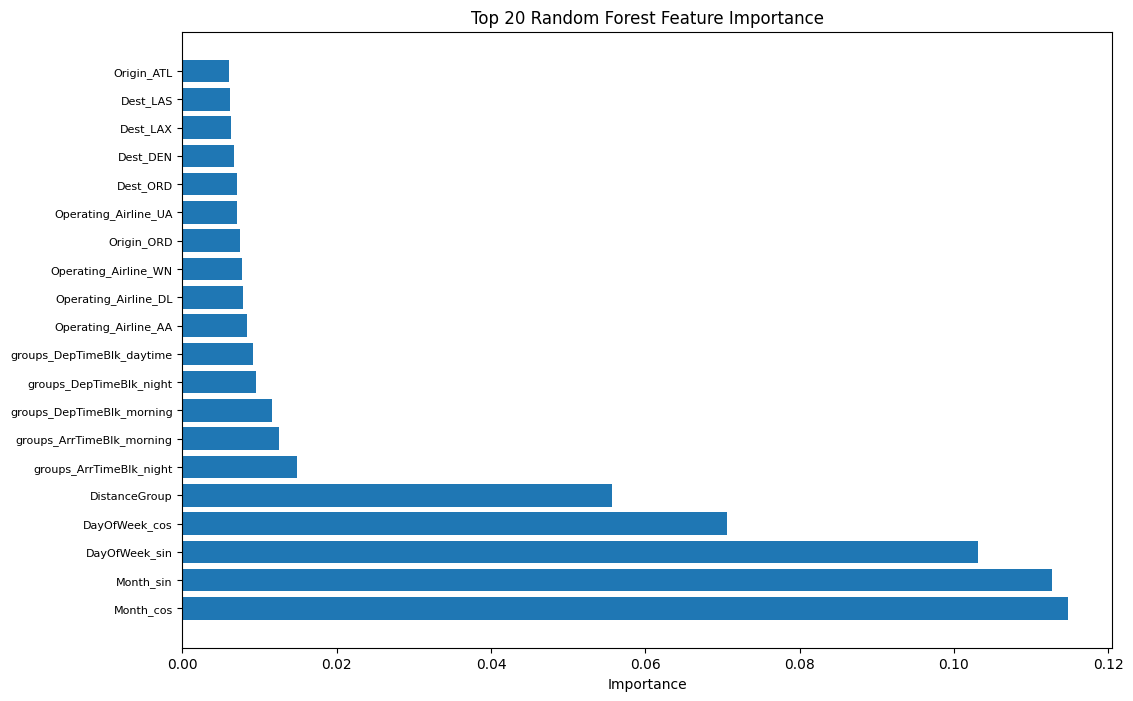

In [144]:
# Get feature importances
feature_importances = randomF.feature_importances_


# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Number of top features to display
top_n = 20

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(top_n), feature_importances[indices][:top_n])
plt.yticks(range(top_n), columns[indices][:top_n], fontsize=8)
plt.xlabel('Importance')
plt.title('Top {} Random Forest Feature Importance'.format(top_n))
plt.show()


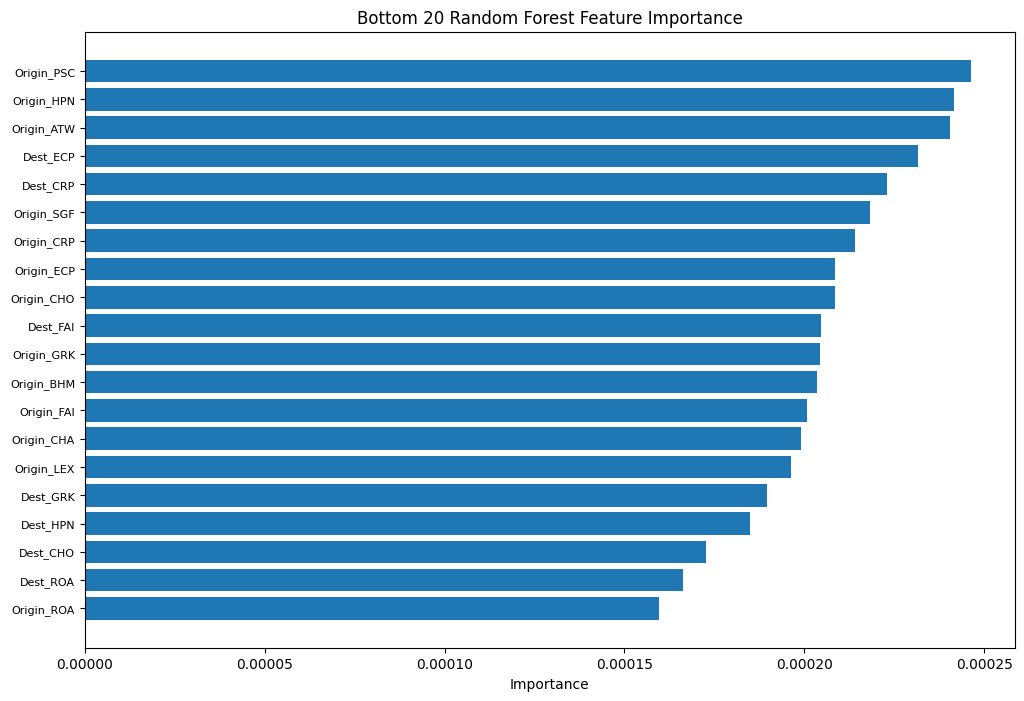

In [145]:
indices_asc = feature_importances.argsort()

# Number of bottom features to display
bottom_n = 20

# Plot the bottom N feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(bottom_n), feature_importances[indices_asc][:bottom_n])
plt.yticks(range(bottom_n), columns[indices_asc][:bottom_n], fontsize=8)
plt.xlabel('Importance')
plt.title('Bottom {} Random Forest Feature Importance'.format(bottom_n))
plt.show()


In [152]:
randomF_or_de = RandomForestClassifier(class_weight='balanced', random_state=42)
randomF_or_de.fit(X_train_t_or_de , y_train_or_de)
y_preds_tr = randomF_or_de.predict(X_train_t_or_de)
y_preds = randomF_or_de.predict(X_test_t_or_de)

print('Train data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds_tr,y_train_or_de))
print('f1_score: %.3f' % f1_score(y_preds_tr,y_train_or_de, average='binary'))
print('recall: %.3f' % recall_score(y_preds_tr,y_train_or_de,average='binary'))
print('precision: %.3f' % precision_score(y_preds_tr,y_train_or_de,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds_tr,y_train_or_de))

print('Test data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds,y_test_or_de))
print('f1_score: %.3f' % f1_score(y_preds, y_test_or_de, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test_or_de,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test_or_de,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds,y_test_or_de))


Train data scores:
accuracy: 0.701
f1_score: 0.530
recall: 0.420
precision: 0.718
Confusion Matrix:  [[345206  42760]
 [150925 109109]]
Test data scores:
accuracy: 0.662
f1_score: 0.464
recall: 0.369
precision: 0.623
Confusion Matrix:  [[83642 14302]
 [40391 23665]]


In [119]:
randomF = RandomForestClassifier(class_weight='balanced', random_state=42)
randomF.fit(X_train_t_dep , y_train_dep)
y_preds_tr = randomF.predict(X_train_t_dep)
y_preds_dep = randomF.predict(X_test_t_dep)
print('Train data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds_tr,y_train_dep))
print('f1_score: %.3f' % f1_score(y_preds_tr, y_train_dep, average='binary'))
print('recall: %.3f' % recall_score(y_preds_tr, y_train_dep,average='binary'))
print('precision: %.3f' % precision_score(y_preds_tr, y_train_dep,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds_tr,y_train_dep))

print('Test data scores:')
print('accuracy: %.3f' % accuracy_score(y_preds_dep,y_test_dep))
print('f1_score: %.3f' % f1_score(y_preds_dep, y_test_dep, average='binary'))
print('recall: %.3f' % recall_score(y_preds_dep, y_test_dep,average='binary'))
print('precision: %.3f' % precision_score(y_preds_dep, y_test_dep,average='binary'))
print("Confusion Matrix: ", confusion_matrix(y_preds_dep,y_test_dep))


Train data scores:
accuracy: 0.899
f1_score: 0.813
recall: 0.716
precision: 0.940
Confusion Matrix:  [[439659   9157]
 [ 56472 142712]]
Test data scores:
accuracy: 0.817
f1_score: 0.635
recall: 0.596
precision: 0.681
Confusion Matrix:  [[106513  12129]
 [ 17520  25838]]


In [ ]:
r


In [98]:
# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=randomF, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_t, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

best_score = grid_search.best_score_

# Make predictions on the test set
y_preds = best_model.predict(X_test_t)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print("Best Parameters:", best_params)
print("Score/Accuracy on validation:", best_score)
print("Accuracy on Test Set:", accuracy)
print("Recall on Test Set:", recall)


KeyboardInterrupt: 

In [85]:
cross_val_score(randomF, X_train_t, y_train, cv=5, scoring='recall').mean()


KeyboardInterrupt: 

## Catboost

In [96]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(scale_pos_weight=3, random_state=42)
catboost_classifier.fit(X_train_t , y_train)
y_preds = catboost_classifier.predict(X_test_t)
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


Learning rate set to 0.036383
0:	learn: 0.6919664	total: 63.7ms	remaining: 1m 3s
1:	learn: 0.6903159	total: 70.8ms	remaining: 35.3s
2:	learn: 0.6887250	total: 76.3ms	remaining: 25.4s
3:	learn: 0.6876959	total: 81ms	remaining: 20.2s
4:	learn: 0.6864580	total: 85.7ms	remaining: 17s
5:	learn: 0.6852409	total: 90.1ms	remaining: 14.9s
6:	learn: 0.6839357	total: 94.7ms	remaining: 13.4s
7:	learn: 0.6826410	total: 98.7ms	remaining: 12.2s
8:	learn: 0.6816387	total: 103ms	remaining: 11.4s
9:	learn: 0.6810163	total: 107ms	remaining: 10.6s
10:	learn: 0.6801586	total: 112ms	remaining: 10.1s
11:	learn: 0.6792156	total: 116ms	remaining: 9.53s
12:	learn: 0.6782019	total: 120ms	remaining: 9.12s
13:	learn: 0.6773329	total: 125ms	remaining: 8.79s
14:	learn: 0.6765139	total: 130ms	remaining: 8.5s
15:	learn: 0.6759246	total: 134ms	remaining: 8.23s
16:	learn: 0.6751755	total: 138ms	remaining: 7.99s
17:	learn: 0.6746953	total: 143ms	remaining: 7.8s
18:	learn: 0.6739624	total: 148ms	remaining: 7.63s
19:	learn

177:	learn: 0.6400636	total: 981ms	remaining: 4.53s
178:	learn: 0.6399987	total: 986ms	remaining: 4.52s
179:	learn: 0.6398500	total: 991ms	remaining: 4.51s
180:	learn: 0.6398051	total: 997ms	remaining: 4.51s
181:	learn: 0.6397372	total: 1s	remaining: 4.5s
182:	learn: 0.6396446	total: 1.01s	remaining: 4.5s
183:	learn: 0.6395278	total: 1.01s	remaining: 4.49s
184:	learn: 0.6394970	total: 1.02s	remaining: 4.49s
185:	learn: 0.6393986	total: 1.02s	remaining: 4.48s
186:	learn: 0.6392629	total: 1.03s	remaining: 4.47s
187:	learn: 0.6390801	total: 1.03s	remaining: 4.47s
188:	learn: 0.6388990	total: 1.04s	remaining: 4.48s
189:	learn: 0.6387238	total: 1.05s	remaining: 4.48s
190:	learn: 0.6386344	total: 1.06s	remaining: 4.47s
191:	learn: 0.6385643	total: 1.06s	remaining: 4.47s
192:	learn: 0.6383834	total: 1.07s	remaining: 4.47s
193:	learn: 0.6382438	total: 1.07s	remaining: 4.46s
194:	learn: 0.6381727	total: 1.08s	remaining: 4.45s
195:	learn: 0.6380153	total: 1.08s	remaining: 4.44s
196:	learn: 0.637

350:	learn: 0.6203984	total: 1.77s	remaining: 3.27s
351:	learn: 0.6202925	total: 1.78s	remaining: 3.27s
352:	learn: 0.6201732	total: 1.78s	remaining: 3.26s
353:	learn: 0.6200949	total: 1.79s	remaining: 3.26s
354:	learn: 0.6199644	total: 1.79s	remaining: 3.25s
355:	learn: 0.6198419	total: 1.8s	remaining: 3.25s
356:	learn: 0.6196933	total: 1.8s	remaining: 3.24s
357:	learn: 0.6195836	total: 1.8s	remaining: 3.24s
358:	learn: 0.6195180	total: 1.81s	remaining: 3.23s
359:	learn: 0.6194579	total: 1.81s	remaining: 3.22s
360:	learn: 0.6193156	total: 1.82s	remaining: 3.22s
361:	learn: 0.6192322	total: 1.82s	remaining: 3.21s
362:	learn: 0.6191286	total: 1.83s	remaining: 3.21s
363:	learn: 0.6189743	total: 1.83s	remaining: 3.2s
364:	learn: 0.6188511	total: 1.83s	remaining: 3.19s
365:	learn: 0.6187203	total: 1.84s	remaining: 3.19s
366:	learn: 0.6185188	total: 1.84s	remaining: 3.18s
367:	learn: 0.6184760	total: 1.85s	remaining: 3.17s
368:	learn: 0.6183275	total: 1.85s	remaining: 3.17s
369:	learn: 0.61

526:	learn: 0.6014700	total: 2.56s	remaining: 2.3s
527:	learn: 0.6013814	total: 2.57s	remaining: 2.3s
528:	learn: 0.6012810	total: 2.57s	remaining: 2.29s
529:	learn: 0.6011669	total: 2.58s	remaining: 2.29s
530:	learn: 0.6010472	total: 2.58s	remaining: 2.28s
531:	learn: 0.6009160	total: 2.59s	remaining: 2.28s
532:	learn: 0.6007862	total: 2.59s	remaining: 2.27s
533:	learn: 0.6007417	total: 2.6s	remaining: 2.27s
534:	learn: 0.6005813	total: 2.6s	remaining: 2.26s
535:	learn: 0.6005436	total: 2.6s	remaining: 2.25s
536:	learn: 0.6004136	total: 2.61s	remaining: 2.25s
537:	learn: 0.6003708	total: 2.61s	remaining: 2.25s
538:	learn: 0.6003262	total: 2.62s	remaining: 2.24s
539:	learn: 0.6002490	total: 2.62s	remaining: 2.23s
540:	learn: 0.6001370	total: 2.63s	remaining: 2.23s
541:	learn: 0.6000361	total: 2.63s	remaining: 2.22s
542:	learn: 0.5999810	total: 2.64s	remaining: 2.22s
543:	learn: 0.5999128	total: 2.64s	remaining: 2.21s
544:	learn: 0.5998389	total: 2.65s	remaining: 2.21s
545:	learn: 0.599

700:	learn: 0.5859724	total: 3.36s	remaining: 1.43s
701:	learn: 0.5858807	total: 3.36s	remaining: 1.43s
702:	learn: 0.5858120	total: 3.37s	remaining: 1.42s
703:	learn: 0.5857974	total: 3.37s	remaining: 1.42s
704:	learn: 0.5856910	total: 3.38s	remaining: 1.41s
705:	learn: 0.5856621	total: 3.38s	remaining: 1.41s
706:	learn: 0.5855492	total: 3.38s	remaining: 1.4s
707:	learn: 0.5854597	total: 3.39s	remaining: 1.4s
708:	learn: 0.5854110	total: 3.39s	remaining: 1.39s
709:	learn: 0.5853543	total: 3.4s	remaining: 1.39s
710:	learn: 0.5853202	total: 3.4s	remaining: 1.38s
711:	learn: 0.5851581	total: 3.41s	remaining: 1.38s
712:	learn: 0.5850455	total: 3.41s	remaining: 1.37s
713:	learn: 0.5849406	total: 3.42s	remaining: 1.37s
714:	learn: 0.5848509	total: 3.42s	remaining: 1.36s
715:	learn: 0.5847474	total: 3.42s	remaining: 1.36s
716:	learn: 0.5846665	total: 3.43s	remaining: 1.35s
717:	learn: 0.5845948	total: 3.43s	remaining: 1.35s
718:	learn: 0.5845774	total: 3.44s	remaining: 1.34s
719:	learn: 0.58

872:	learn: 0.5731859	total: 4.13s	remaining: 602ms
873:	learn: 0.5731026	total: 4.14s	remaining: 597ms
874:	learn: 0.5730732	total: 4.14s	remaining: 592ms
875:	learn: 0.5729229	total: 4.15s	remaining: 587ms
876:	learn: 0.5728473	total: 4.15s	remaining: 583ms
877:	learn: 0.5727380	total: 4.16s	remaining: 578ms
878:	learn: 0.5727167	total: 4.16s	remaining: 573ms
879:	learn: 0.5726739	total: 4.17s	remaining: 569ms
880:	learn: 0.5726039	total: 4.17s	remaining: 564ms
881:	learn: 0.5724937	total: 4.18s	remaining: 559ms
882:	learn: 0.5724185	total: 4.18s	remaining: 554ms
883:	learn: 0.5723547	total: 4.19s	remaining: 549ms
884:	learn: 0.5723033	total: 4.19s	remaining: 545ms
885:	learn: 0.5722565	total: 4.2s	remaining: 540ms
886:	learn: 0.5722377	total: 4.2s	remaining: 535ms
887:	learn: 0.5721157	total: 4.2s	remaining: 530ms
888:	learn: 0.5720081	total: 4.21s	remaining: 526ms
889:	learn: 0.5719157	total: 4.21s	remaining: 521ms
890:	learn: 0.5718840	total: 4.22s	remaining: 516ms
891:	learn: 0.5

## XGBoost

In [88]:
xgb_classifier = XGBClassifier(scale_pos_weight=3, random_state=42)
xgb_classifier.fit(X_train_t , y_train)
y_preds = xgb_classifier.predict(X_test_t)
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


accuracy: 0.677
f1_score: 0.457
recall: 0.377
precision: 0.580
Confusion Matrix:  [[87604 15938]
 [36429 22029]]


In [95]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_t , y_train)
y_preds = xgb_classifier.predict(X_test_t)
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


accuracy: 0.773
f1_score: 0.166
recall: 0.599
precision: 0.097
Confusion Matrix:  [[121583  34300]
 [  2450   3667]]


## LightGBM

In [98]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(objective='binary', scale_pos_weight=3, random_state=42)
lgbm_classifier.fit(X_train_t , y_train)
y_preds = lgbm_classifier.predict(X_test_t)
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


[LightGBM] [Info] Number of positive: 4510, number of negative: 14690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 275
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234896 -> initscore=-1.180870
[LightGBM] [Info] Start training from score -1.180870
accuracy: 0.666
f1_score: 0.424
recall: 0.356
precision: 0.524
Confusion Matrix:  [[2608  537]
 [1065  590]]


## Logistic

In [99]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(class_weight='balanced', random_state=42)
logreg_classifier.fit(X_train_t , y_train)
y_preds = logreg_classifier.predict(X_test_t)
print('accuracy: %.3f' % accuracy_score(y_preds,y_test))
print('f1_score: %.3f' % f1_score(y_preds, y_test, average='binary'))
print('recall: %.3f' % recall_score(y_preds, y_test,average='binary'))
print('precision: %.3f' % precision_score(y_preds, y_test,average='binary'))


print("Confusion Matrix: ", confusion_matrix(y_preds,y_test))


accuracy: 0.610
f1_score: 0.413
recall: 0.319
precision: 0.585
Confusion Matrix:  [[2269  468]
 [1404  659]]


/Users/ronjaboehmer/.pyenv/versions/3.10.6/envs/flightdelay/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
